## First step (Getting the dataset)
First we get our dataset from CIFAR-10.

In [3]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 45.9MB/s]


In [5]:
%ls -la

total 19320
drwxr-xr-x 1 root root     4096 Apr 23 05:53 ./
drwxr-xr-x 1 root root     4096 Apr 23 05:50 ../
drwxr-xr-x 4 root root     4096 Mar  7 17:47 CIFAR10/
-rw-r--r-- 1 root root 19760888 Apr 23 05:53 CIFAR10.tar.gz
drwxr-xr-x 4 root root     4096 Apr 19 14:22 .config/
drwxr-xr-x 1 root root     4096 Apr 19 14:23 sample_data/


### Imports
First we need to import tensorflow, keras, numpy and matplotlib.

In [2]:
# Tensorflow
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
# Numpy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# cv
import cv2

### Load dataset
On the next step, we load our dataset

In [6]:
# class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

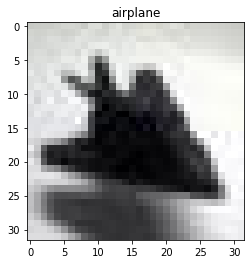

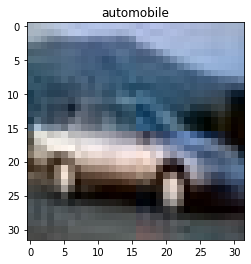

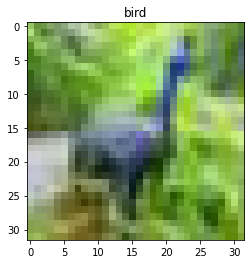

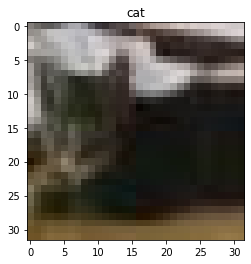

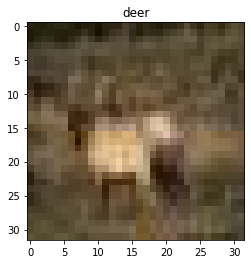

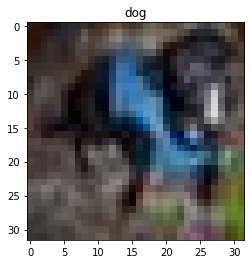

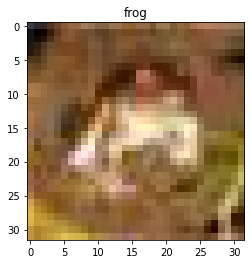

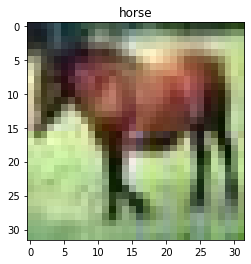

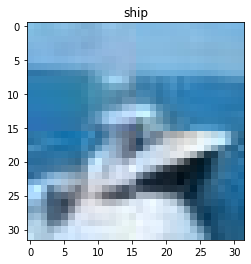

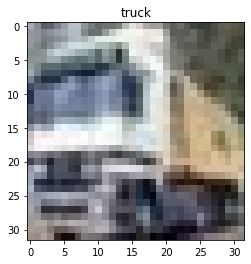

In [ ]:
# displaying one image of each class
for class_name in class_names:
  img = mpimg.imread(f'./CIFAR10/train/{class_name}/0000.jpg')
  imgplot = plt.imshow(img)
  plt.title(class_name)
  plt.show()

### Create the main matrixes 
In this part we are going to create four matrixes. Test data and labases, train data and labels.

Lets being ...

In [7]:
# Selected types
categories = ['airplane', 'automobile', 'bird', 'cat']

In [15]:
train_images, test_images = [], []
train_labels, test_labels = np.array([0, 0, 0, 0]), np.array([0, 0, 0, 0])

In [8]:
# importing os, listdir to get all image files
from os import listdir
from os.path import join

In [16]:
# create matrixes
for category in categories:
  # pathes to our datasets
  train_path = f'./CIFAR10/train/{category}/'
  test_path = f'./CIFAR10/test/{category}/'

  tr_images = [f for f in listdir(train_path)]
  te_images = [f for f in listdir(test_path)]

  tr_images.sort()
  te_images.sort()
  
  # getting the train and test images
  for image in tr_images:
    img = cv2.imread(join(train_path, image))

    train_images.append(img)
    
    lb = np.zeros((1, 4))
    lb[0][categories.index(category )] = 1

    train_labels = np.vstack((train_labels, lb))
  for image in te_images:
    img = cv2.imread(join(test_path, image))

    test_images.append(img)

    lb = np.zeros((1, 4))
    lb[0][categories.index(category )] = 1

    test_labels = np.vstack((test_labels, lb))

# converting our normal lists to numpy array
train_images, test_images = np.array(train_images), np.array(test_images)
# removing the first train labels
train_labels, test_labels = np.delete(train_labels, 0, 0), np.delete(test_labels, 0, 0)

# check the results
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

Train images: (20000, 32, 32, 3)
Train labels: (20000, 4)
Test images: (4000, 32, 32, 3)
Test labels: (4000, 4)


### Convergin to gray scale
Now we convert our images to gray scale.

In [17]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [19]:
# now we convert
train_images, test_images = rgb2gray(train_images), rgb2gray(test_images)
# checking the results
print("Train images:", train_images.shape)
print("Test images:", test_images.shape)

Train images: (20000, 32, 32)
Test images: (4000, 32, 32)


### Normalising the images
Now we are going to normalise our images by dividing them in to 255,
after that our images will be a number between 0 and 255, hense the calculations will be less complex.

In [20]:
# normalisation
train_images, test_images = train_images / 255, test_images / 255

### Flating our data
In this part we are going to make our data flat by reshaping its vectors.

In [21]:
# making our data flat
train_images, test_images = train_images.reshape(-1, 1024), test_images.reshape(-1, 1024)
# checking the results
print("Train images:", train_images.shape)
print("Test images:", test_images.shape)

Train images: (20000, 1024)
Test images: (4000, 1024)


### Shuffling our dataset
In this part we are going to shuffle our dataset in a random way.

In [22]:
# our shuffle function
def shuffle(images, lable):
  # first we accumulate two arrays in to tuples
  temp = np.hstack((images, lable))
  # then we shuffle the tuples
  np.random.shuffle(temp)
  # now we split the arrays that we accumulate at the beginning 
  return (np.hsplit(temp, np.array([1024, ])))[0], (np.hsplit(temp, np.array([1024, ])))[1]

In [23]:
train_images, train_labels = shuffle(train_images, train_labels)
test_images, test_labels = shuffle(test_images, test_labels)

### First Part Conclusion 
In this part, we loaded our dataset. After that we created our main matrixes
from the first four categories of the first dataset images.

After that we implemented some methods to reduce the complexity of calculations in the next steps. These methods were, converting our images to gray scale, normalising our dataset, and finaly flating our data.

And for the final step, we shuffle our dataset to begin the next part.

## Second step (Feed forward)
In this step, we are going to implement the feed forwarding algorithm, so we can create our neural network.

### Methods
In this part we are going to create the methods, that are going to be used in this part.

#### Sigmoid
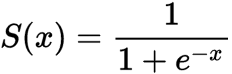

In [24]:
# sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#### Sigmoid prime

In [25]:
# sigmoid prime function
def sigmoid_prime(z):
  return sigmoid(z) * (1 - sigmoid(z))

### Feed forwarding
Now we are going to implement the feed forwarding by the methods we have.

In [26]:
# get the first 200 of our train images
X = (np.vsplit(train_images, np.array([200, ])))[0]
Y = (np.vsplit(train_labels, np.array([200, ])))[0]

In [27]:
# creating our levels nodes numbers
L1, L2, L3, L4 = 1024, 16, 16, 4

In [28]:
# creating the weight matrixes 
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))

In [29]:
# creating the bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [30]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

### Find the answer
Now that we implement our feed forwarding algorithm, its time to find the results.

In [33]:
# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1

### Calculating the accuracy 
Now we are going to calculate the accuracy, which we predict to be around 25.

In [34]:
# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 200) * 100
print("Accuracy:", ac)

Accuracy: 22.5
